# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

**Let's start by importing libraries we need.**

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
x= np.random.randn(4,3)

y= np.random.randn(1,3)

z=x*y

a=np.array([[1,1,1],[1,1,1],[1,1,1]])

b=np.array([[2,2,2],[2,2,2],[2,2,2]])

c=a*b
print(c)

e = np.multiply(a,b)
print(e)

d= np.dot(a,b)
print(d)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]


In [ ]:
a = np.array([[1,1,1],[1,1,1]])
b = np. array([[2,2,2],[2,2,2]])
c =np.sum(abs(a-b),axis = 1, keepdims = True)
c

array([[3],
       [3]])

In [ ]:
t_image = np.array([[[ 1,  2],
                     [ 3,  4],
                     [ 5 ,  6]],

                   [[ 7,  0.8],
                    [ 0.9,  0.10],
                    [ 0.11,  0.12]],

                   [[ 0.13,  0.14],
                    [ 0.15,  0.16],
                    [ 0.17,  0.18]],

                    [[ 0.19,  0.20],
                    [ 0.21,  0.22],
                    [ 0.23,  0.94630077]]])
v= t_image.reshape(t_image.shape[0]*t_image.shape[1]*t_image.shape[2])
v


array([1.  , 2.  , 3.  , 4.  , 5.  , 6.  , 7.  , 0.8 , 0.9 , 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24])

In [ ]:
x = np.array([[0., 3., 4.],
              [1., 6., 4.]])

a = np.sum(x,axis =1,keepdims = True)
a

array([[ 7.],
       [11.]])

In [ ]:

y.sum()

78.0

## Loading the dataset

In [ ]:
# import google drive and mount drive
from google.colab import drive
drive.mount('/content/drive/')

df_Load = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BankChurners.csv")

Mounted at /content/drive/


In [ ]:
# copying data to another variable to avoid any changes to original data
df = df_Load.copy()

## Data Overview

In [ ]:
# Study the shape,info, statistical info etc of the data

#1. Shape
print('Shape:', df.shape)

Shape: (10127, 21)


In [ ]:
#2. Check the data types of the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#3. Show info of df for columns of object type only
print(df.select_dtypes(include='object').info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  8608 non-null   object
 3   Marital_Status   9378 non-null   object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB
None


In [ ]:
#4. Review a few rows of the data
df.head(10)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [ ]:
df.tail(10)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
#Perform Sanity checks of the data

#1. Check for null values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# 3. Check for duplicate values
df.duplicated().sum()

0

In [ ]:
#4. Check for unique values
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [ ]:
# Review statistical summary - seperately for numerical and object type features
#1. Stat summary for numerical varables -
print('\nStatistical details:\n',df.describe(include=["int64","float64"]).T.to_string())


Statistical details:
                              count          mean          std           min           25%           50%           75%           max
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000 713036770.500 717926358.000 773143533.000 828343083.000
Customer_Age             10127.000        46.326        8.017        26.000        41.000        46.000        52.000        73.000
Dependent_count          10127.000         2.346        1.299         0.000         1.000         2.000         3.000         5.000
Months_on_book           10127.000        35.928        7.986        13.000        31.000        36.000        40.000        56.000
Total_Relationship_Count 10127.000         3.813        1.554         1.000         3.000         4.000         5.000         6.000
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000         2.000         2.000         3.000         6.000
Contacts_Count_12_mon    10127.000         2.455     

In [ ]:
#2. Stat summary for categorical varables -
print(df.describe(include=["object"]).T.to_string())

                 count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436


In [ ]:
#2a. Show all the values for categorical varables -
for i in df.describe(include=["object"]).columns:
    print("Category values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Category values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Category values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Category values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Category values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Category values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
****************************************

**Data Overview - Observations:**
- There are 10127 rows and 21 columns. Of the 21 columns, six are category columns.
- 'Credit_limit', 'Avg_open_to_buy',' Avg_Utilization_Ratio' and 'Total_Trans_Amt' features are right skewed; have outliers.

**Sanity Checks**
- Features that have missing/null values include 'Education_Level'(1519) and "Marital_Status'(749). We will further processes these in the following section
- There are no duplicates in the data
- On closely reviewing the category values for 'Income_Category', we see that one of the values is 'abc' which looks erroneous. We will fix it in the following section



## Cleaning the data-set prior to EDA
Here, we will quickly
- a)impute data based on the sanity checks done in the prior section and
- b) drop columns that are irrelavent to the analysis


In [ ]:
# We will quickly clean the data in this section, to ready it for EDA.
# We will 1) Impute data based on the sanity checks done in the prior section and 2) drop columns that are irrelavent to the analysis

#1. Impute missing data wrt 'Education_Level', 'Marital_Status' and 'Income_Category' with the respective most frequent value in the category
df_copy = df.copy() # take a copy of the df

# replace the values 'abc' in Income_Category with nan values so the SimpleImputer can work on all the nan values collectively
df_copy['Income_Category'] = df_copy['Income_Category'].replace('abc', np.nan)

#create an instance of a simple imputer and use it to transform the data
imp_categorical = SimpleImputer(strategy='most_frequent')
imp_categorical.fit(df_copy) # fit the df copy

imputed_ndarray = imp_categorical.transform(df_copy) # transform data by imputing with most frequent values for all nan in respective columns

df_imputed = pd.DataFrame(imputed_ndarray,columns= df_copy.columns) # convert the np ndarray to a pd DataFrame

#The features of df_imputed are all 'object' type beause we re-casted it from the ndarry datatype. Some features therefore need to be moved back to int64 and float64 datatypes.
int64_features = df_copy.select_dtypes(include=['int64']).columns.tolist()
float64_features = df_copy.select_dtypes(include=['float64']).columns.tolist()
for eachfeature in int64_features:
  df_imputed[eachfeature] = df_imputed[eachfeature].astype('int64')
for eachfeature in float64_features:
  df_imputed[eachfeature] = df_imputed[eachfeature].astype('float64')


df_imputed.isna().sum() # check to ensure there are no null values anymore


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#3. Drop columns that may not be relevant.
# Drop 'CLIENTNUM' since it is just a client identifier number
# Also drop 'Avg_Open_To_Buy' column since 'Avg_Utilization_Ratio' along with 'Credit_Limit' captures this same information aswell
df_CleanedUpCols = df_imputed.drop(columns = ['CLIENTNUM','Avg_Open_To_Buy'],axis = 1)
df_CleanedUpCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

## **Exploratory Data Analysis (EDA)**

We will perform univariate analysis on all the variables and provide observations on their distributions. (histograms, boxplots, countplot etc).

We will also perform bi-variate analysis to explore relationships between the important variables in the dataset (ie explore relations between numerical variables as well as relations between numerical and categorical variables;inclduing ofcourse the relationships of all the 'x' variables with the target 'y' variable ie 'Attrition_Flag')

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    # Get the current figure and change its sizes
    fig = plt.gcf()
    fig.set_figwidth(3)
    fig.set_figheight(5)
    plt.tight_layout()

    plt.show()  # show the plot
    #@

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,normalize='index')#.sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    fig = plt.gcf()
    fig.set_figwidth(1.5)
    fig.set_figheight(3)
    plt.show()

In [ ]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 5))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### *UNIVARIATE ANALYSIS*

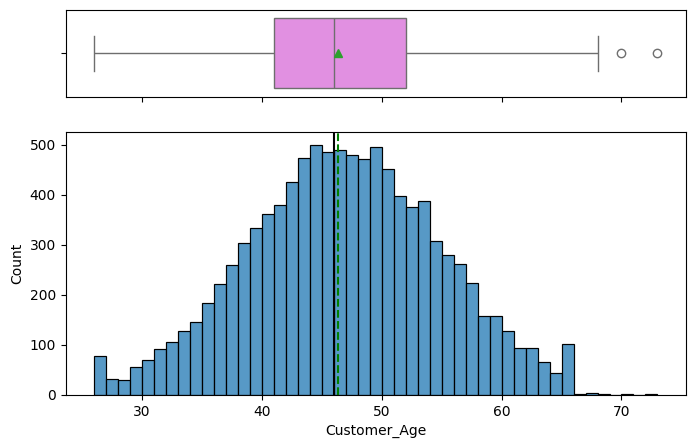

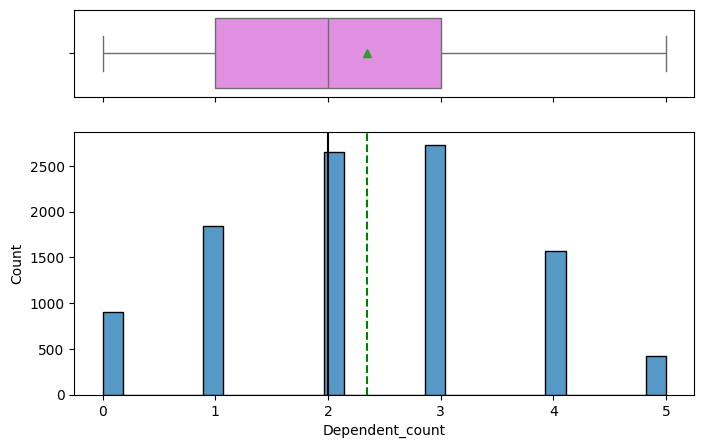

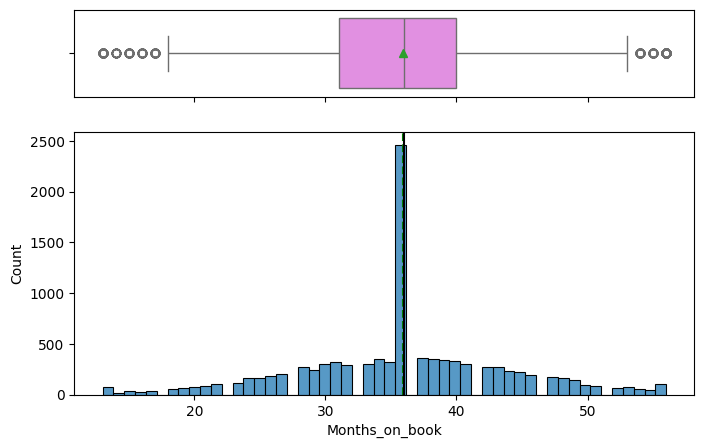

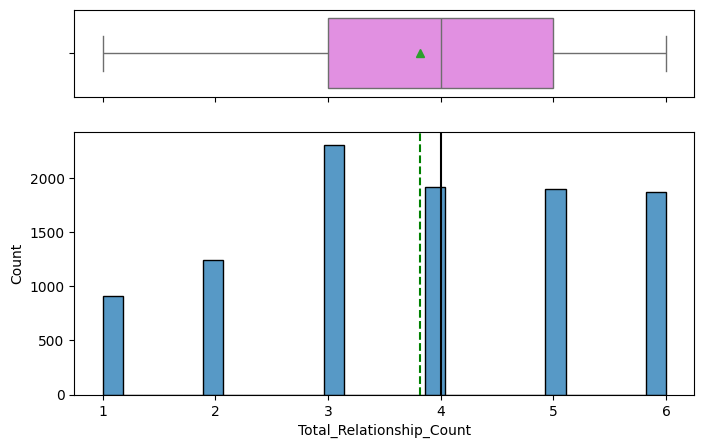

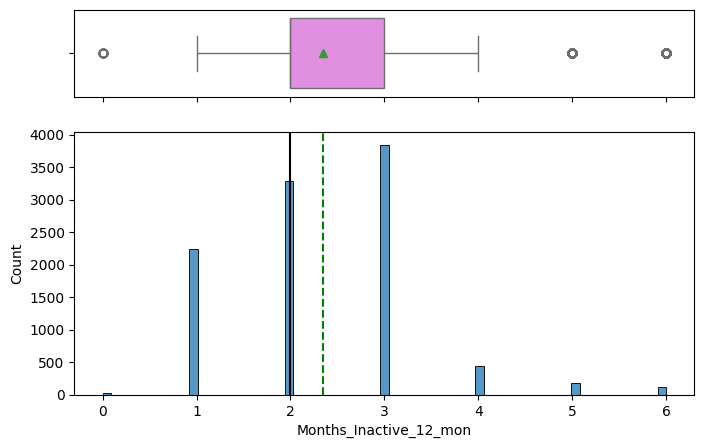

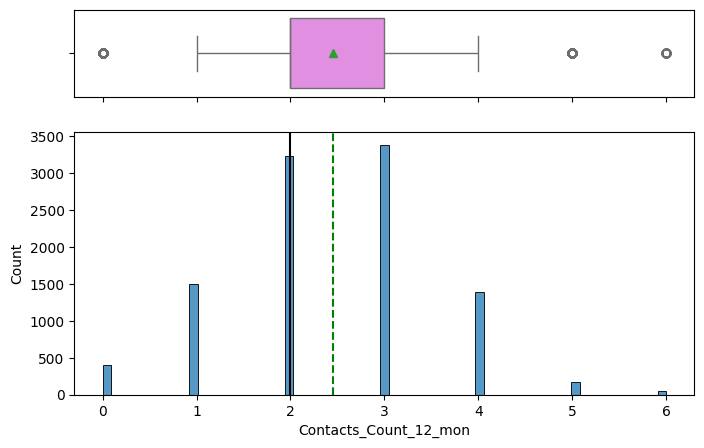

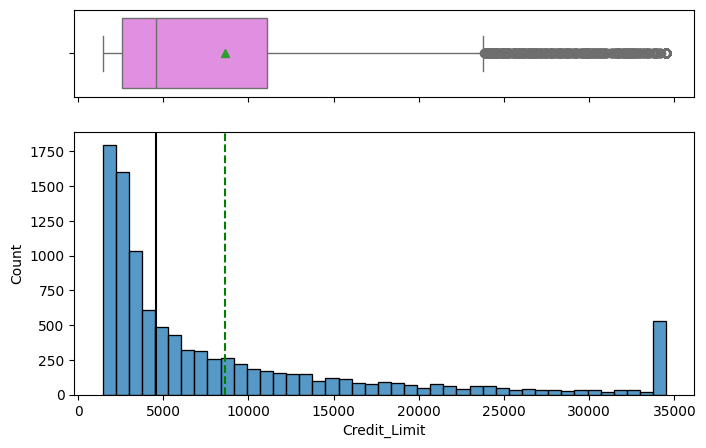

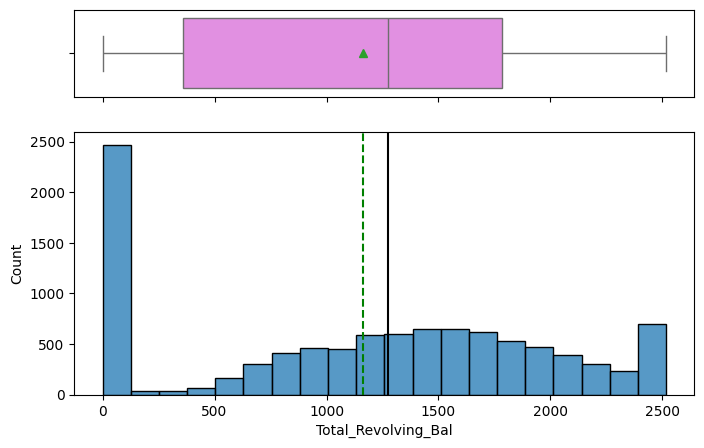

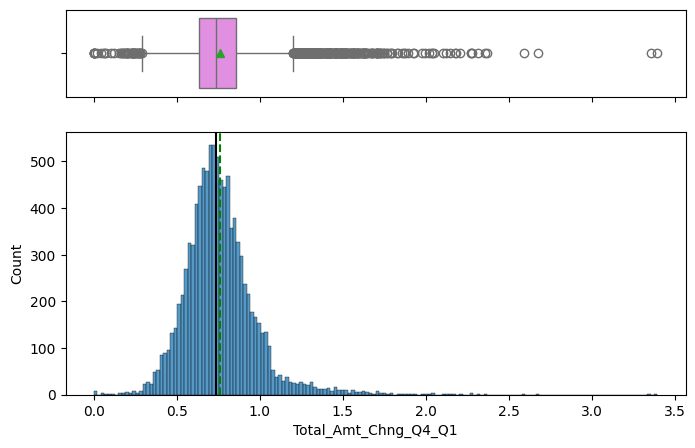

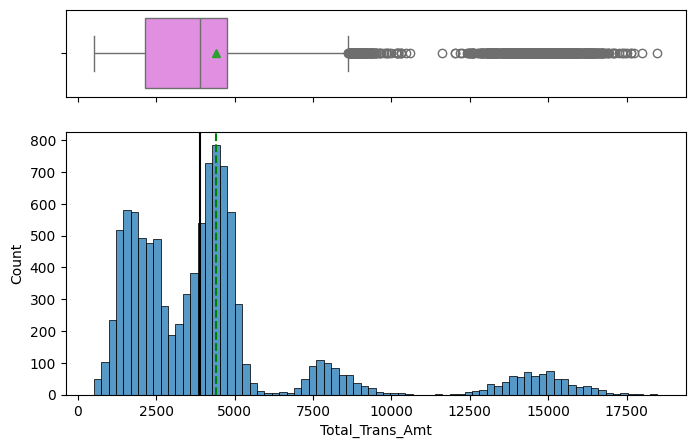

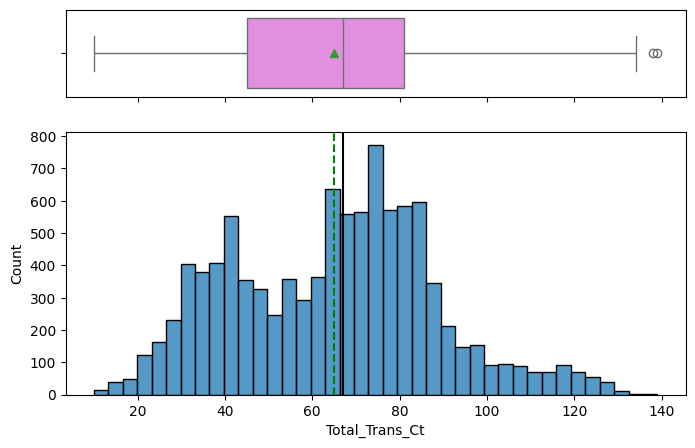

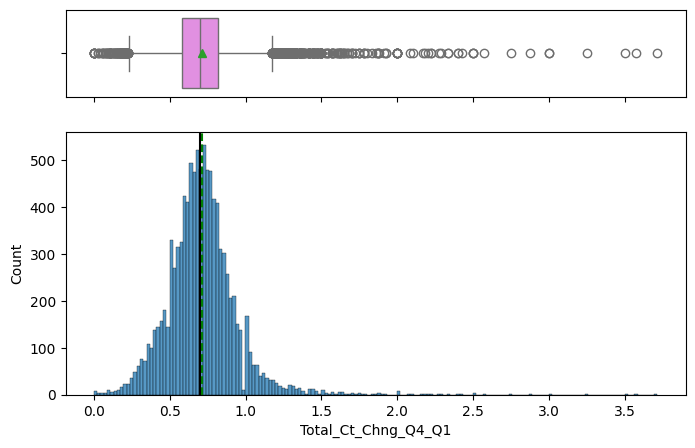

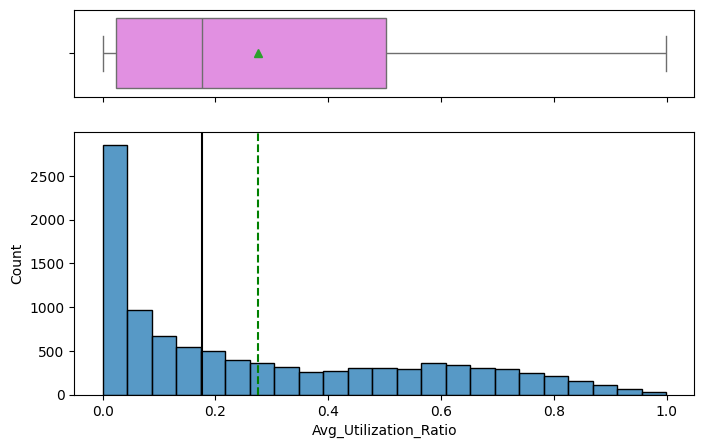

In [ ]:
#1. Analysis of numerical features

# Use the histogram_boxplot function to analyse the  numerical type features only. Drop the non numerical columns
df_numericalcols = df_CleanedUpCols.copy()
df_numericalcols = df_numericalcols.drop(columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],axis = 1)
for i in df_numericalcols.columns.to_list():
  histogram_boxplot(df_numericalcols,i)

Observations:
- Customer_Age: Mean/median age is ~46 yrs.(feature is a normal distribution with few outliers.Mean / median are close by at 46.3 and 46)

- Dependent_Count: Avg no. of dependeds per customer is 2. (feature is normal distribution, mean / median are close by at 2.0 and 2.3)

- Month_on_books: A large percentage of customer are at the median (ie 36 months), otherwise the feature is normally distributed

- Total_Relationship_Count: uniform distribution, mean and median close at 3.8 and 4 per customer

- Months_inactive: Normal distribution, mean and median close at 2.3 and 2

- Contacts_Count_12mon: normal distribution, mean/median at 2 & 2.4

- Credit_Limit: Large number of outliers, right skewed distribution; mean at 8631, median at 4549. ie Customers have a typical spend limit of ~4500 dollars while some outlier customers have spend limit at a much higher value

- Total_Amt_chge_Q4_Q1: normal distribution, large number of outliers on both sides of the median. Both mean and median are less than 1 (respectively at 0.76 and 0.73), which means that customers have reduced spend from Q4 to Q1. Q1 spend is about 73%-76% of Q1 spend by customers.

- Total_Tran_Amt: Multi-modal right skewed distribution. Mean & meadian close to each other. This metrics needs to be analysed in conjuction with other features to better decipher the multimodal nature.

- Total_Ct_Chng_Q4_Q1: normal distribution with right skew. Large no. of outliers to the right. Again, both mean and median are less than 1 (respectively at 0.71 and 0.70), which means that customers have reduced the no. of trasnactions from Q4 to Q1.

- Avg_Util_Ratio: Mean utlization raio is 27.5%. ie on an average, customers spend only about 27.5% of their credit limit.This is also reflected in the fact that 50% of the customer base spends less than 17.6% of their credit limit.

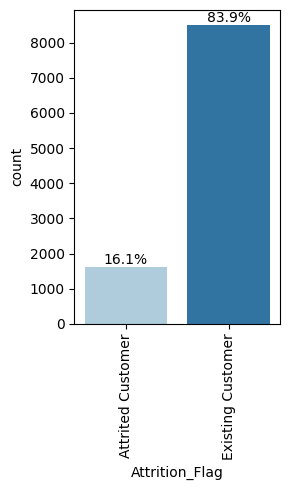

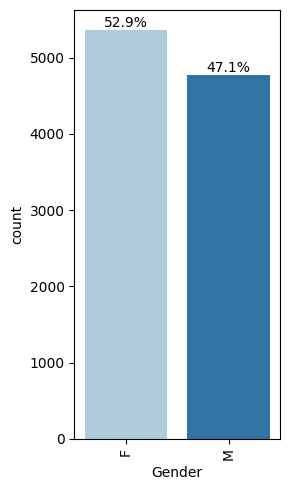

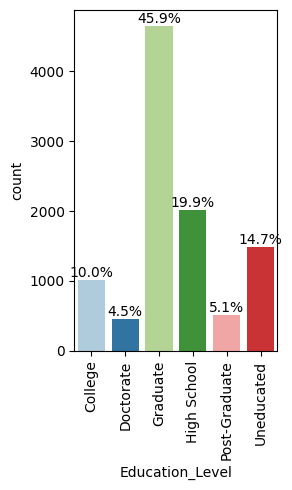

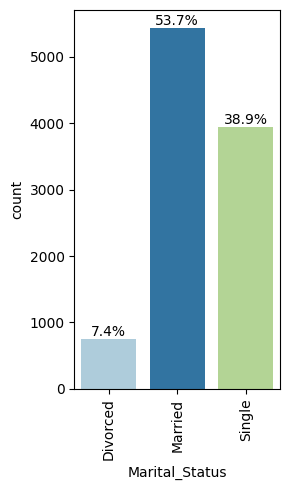

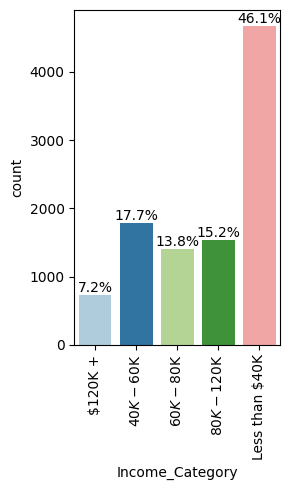

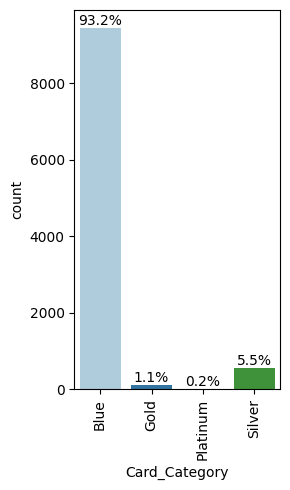

In [ ]:
#2. Filter for and analyse the categorical variables
df_with_cat_cols = df_CleanedUpCols[['Attrition_Flag', 'Gender','Education_Level','Marital_Status','Income_Category','Card_Category']].copy()
for i in df_with_cat_cols.columns.to_list():
  labeled_barplot(df_with_cat_cols,i,perc=True)

Observations:
- 16.1% of customers have attrited (This is our reference 'y' variable)
- 52.9% of customers are females.
- ~46% customers are Graduates followed by next highest % who are High Schoolers at ~20%
- ~54% are married customers followed by ~39% customers who are single.
- ~ 46% of customers are in the income category of 'less than 40k dollars'.
- About 93% customer are in the 'Blue' card_category.

#### *BIVARIATE ANALYSIS*

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                           0.174              0.826
M                           0.146              0.854
All                         0.161              0.839
----------------------------------------------------------------------------------------------------


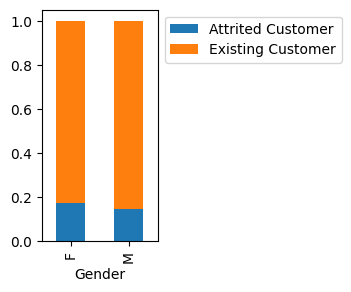

Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                      0.152              0.848
Doctorate                    0.211              0.789
Graduate                     0.160              0.840
High School                  0.152              0.848
Post-Graduate                0.178              0.822
Uneducated                   0.159              0.841
All                          0.161              0.839
----------------------------------------------------------------------------------------------------


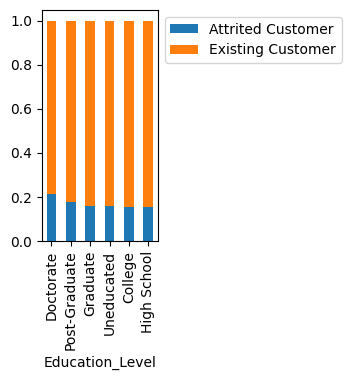

Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                    0.162              0.838
Married                     0.154              0.846
Single                      0.169              0.831
All                         0.161              0.839
----------------------------------------------------------------------------------------------------


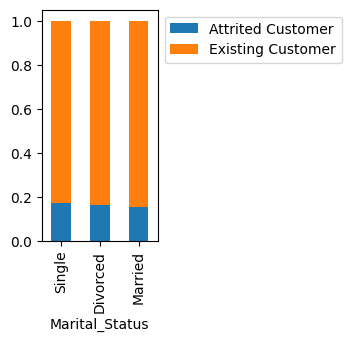

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                      0.173              0.827
$40K - $60K                  0.151              0.849
$60K - $80K                  0.135              0.865
$80K - $120K                 0.158              0.842
Less than $40K               0.171              0.829
All                          0.161              0.839
----------------------------------------------------------------------------------------------------


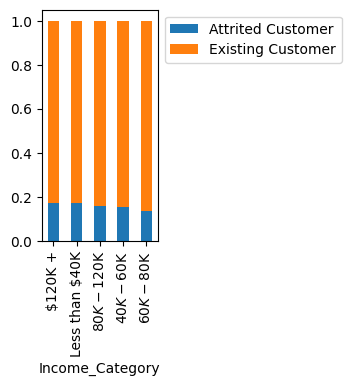

Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                        0.161              0.839
Gold                        0.181              0.819
Platinum                    0.250              0.750
Silver                      0.148              0.852
All                         0.161              0.839
----------------------------------------------------------------------------------------------------


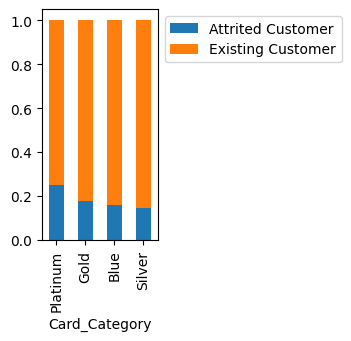

In [ ]:
#First, Study the relationship between the target varaible (ie Attrition_Flag) and the other categorial variables
for i in df_with_cat_cols.columns.to_list():
  if(i != 'Attrition_Flag'):
    stacked_barplot(df_with_cat_cols, i, 'Attrition_Flag')

Observations:
- Customer attrition seems to be fairly agnostic of the Gender feature. In both cases between 14%-17% of customers have attrited

- Again,  Customer attrition seems to be fairly agnostic of the Education feature barring the Doctorate category. Across other cases between 15%-17% of customers have attrited while it is interesting to note that about 21% of customers with Doctorate degree have attrited.

- Attrition% seems is also agnositic of Marital_status and Income_category aswell.

- It is interesting to note that 25% of customers with Platinum category have attrited while rest of the card-categories have attrition in the range of 14-18%

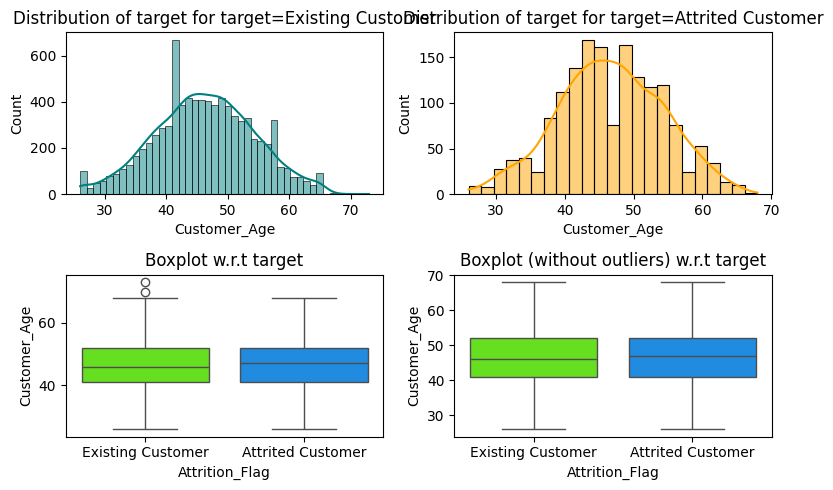

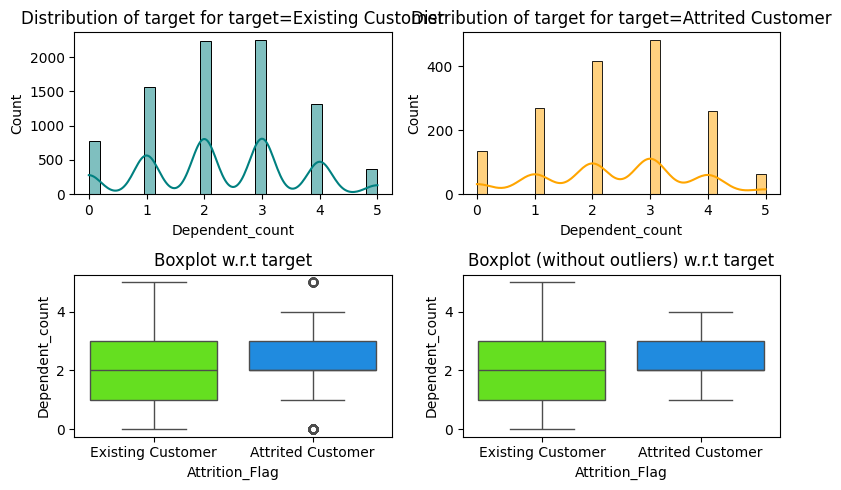

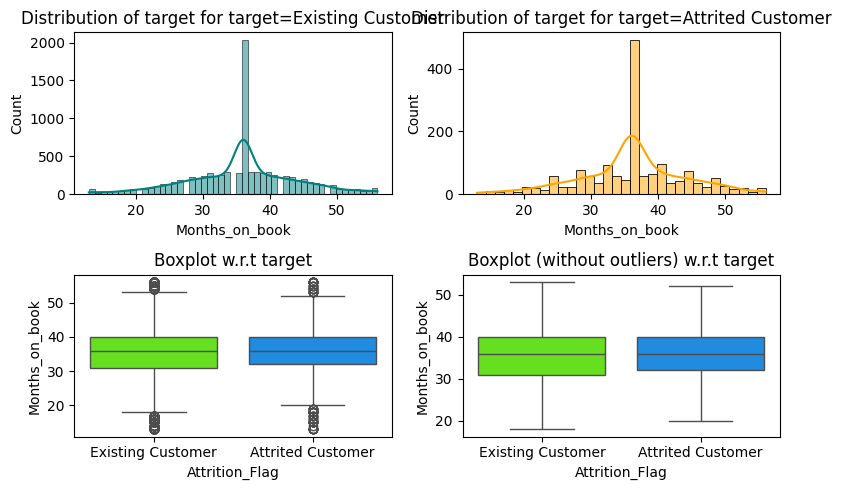

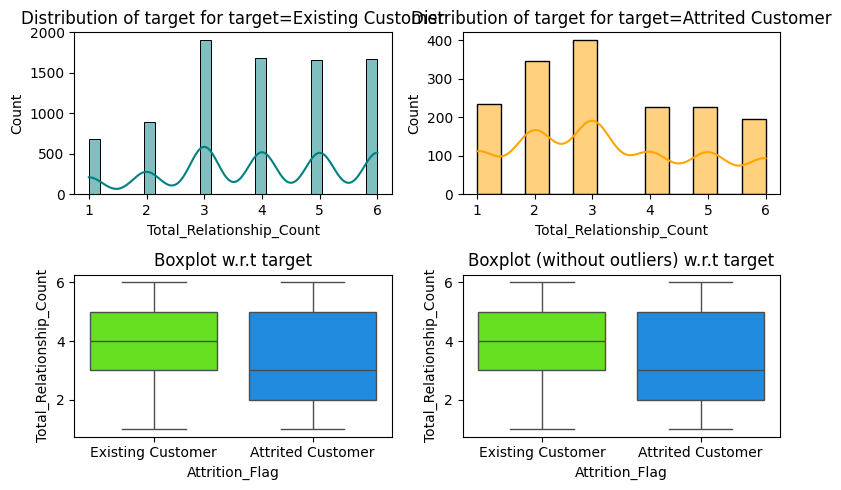

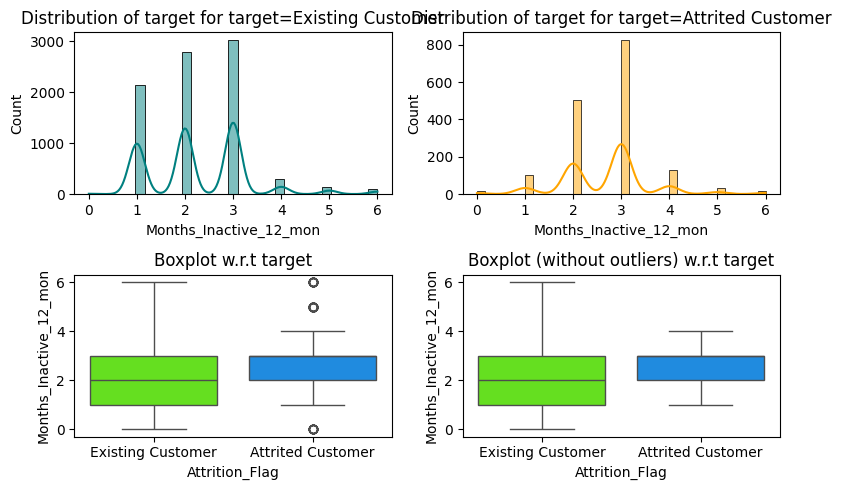

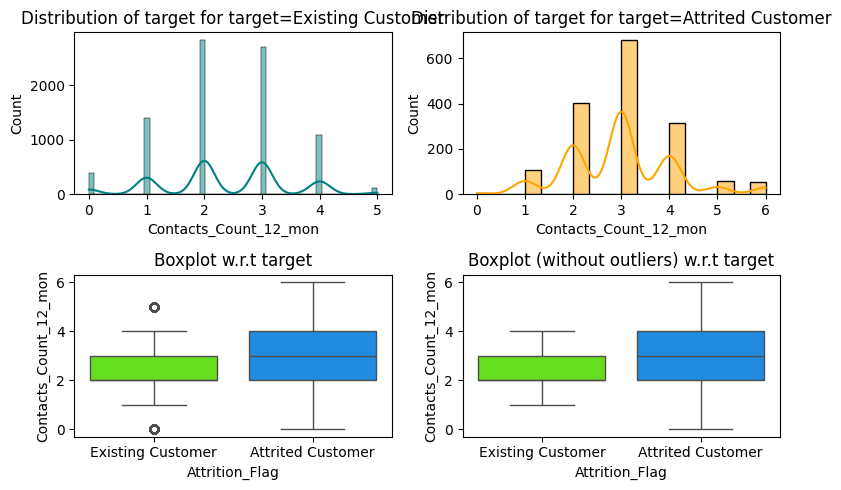

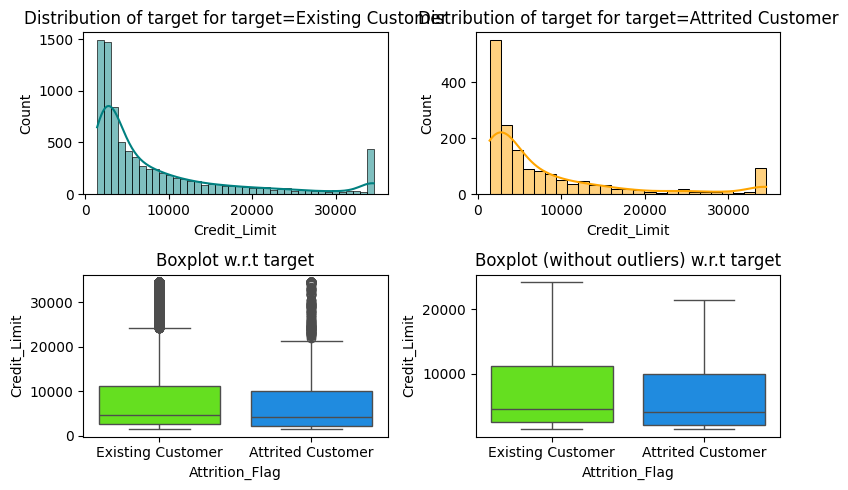

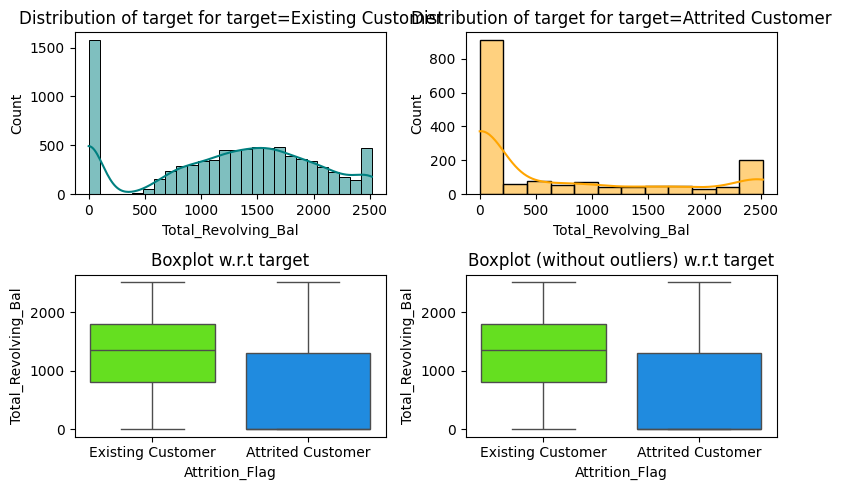

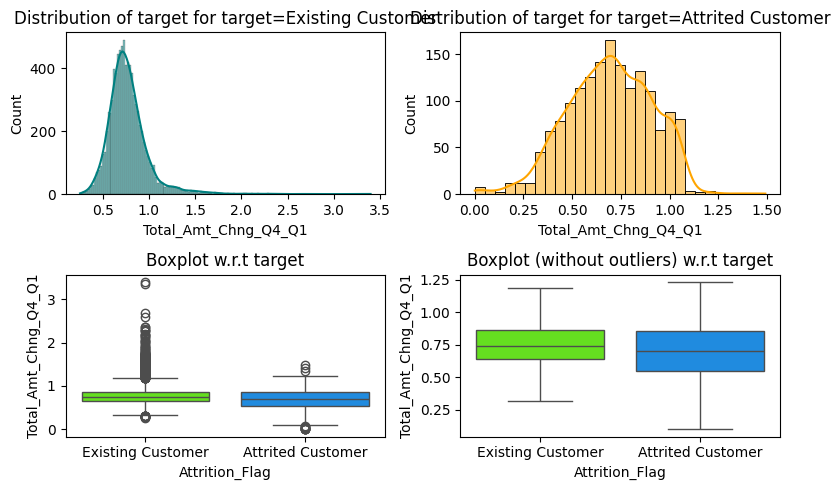

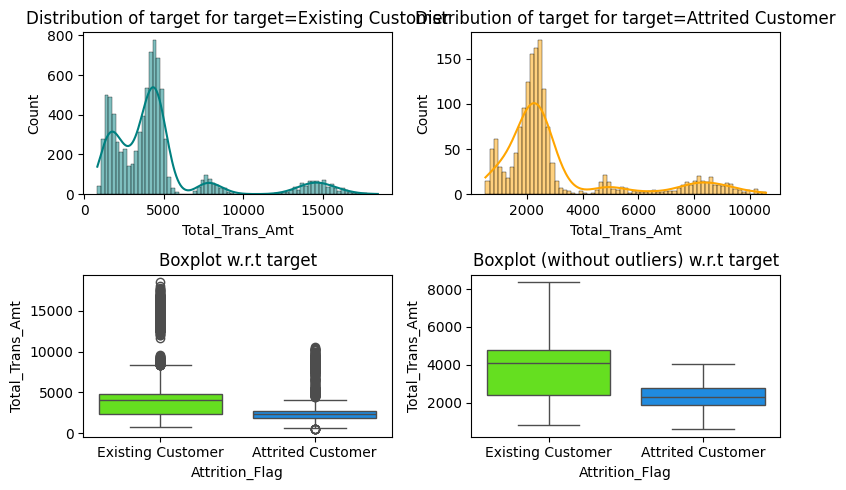

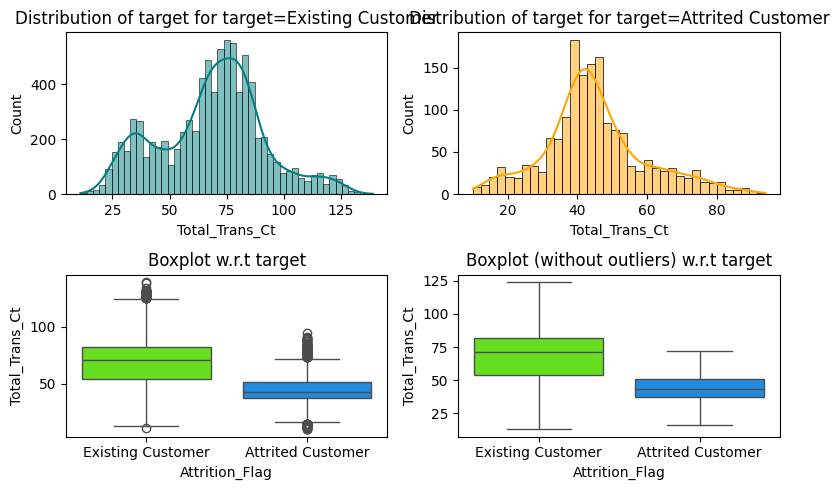

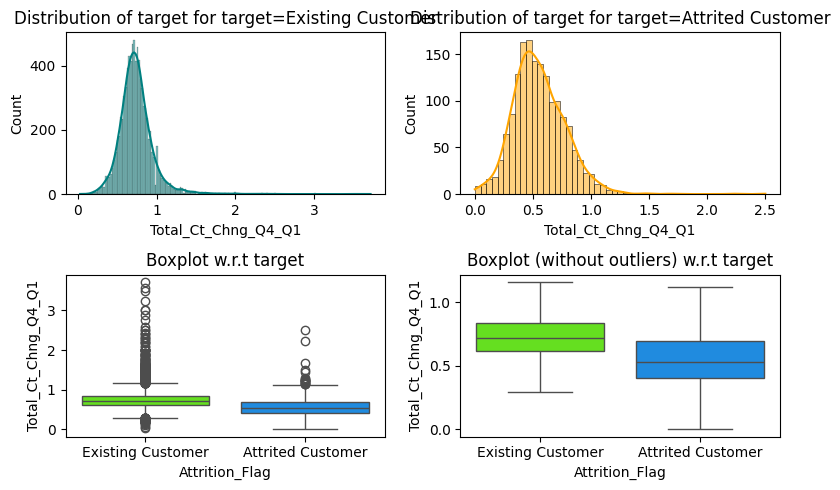

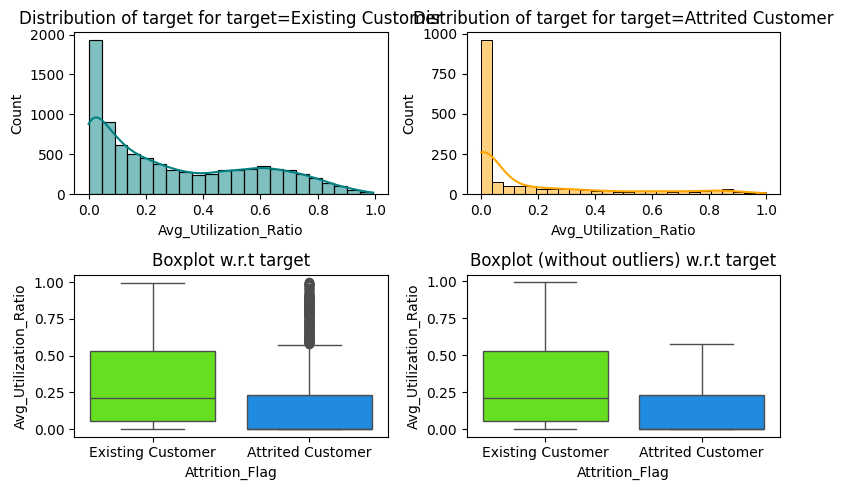

In [ ]:
# study the relationship between target variable (ie Attrition_Flag, a categorical variable) and the numerical variables
# Filter for the columns of interest to begin with
select_cols = df_CleanedUpCols.select_dtypes(include=['int64','float64']).columns.tolist()
select_cols = select_cols + ['Attrition_Flag']

df_selectcols = df_CleanedUpCols[select_cols].copy()

# draw the graphs
for i in df_selectcols.columns.to_list():
  if(i != 'Attrition_Flag'):
    distribution_plot_wrt_target(df_selectcols, i, 'Attrition_Flag')

Observations:
- Customer attrition seems to be fairly agnostic of Customer Age,  Months_on_book.

- Wrt to Dependent_count, 50%+ of attrited customers seemed to have had more than 2 dependents

- Wrt to Total_Relationship_count, customers who have attrited have had a lower relationship count ( less than 3) compared to those who have not attrited.

- Wrt Months_inactive_12_mon, 50*+ of Attrited customers showed inactivity of more than 2 months.

- Wrt Contacts_Count_12_mon, 50% of attrited customers showed a contact count of more than 3 to up to as high as 6.

- Attrited customers show a marginally lower credit limit compard to existing customers

- Attrited customers show relatively a much lower revolving credit balance- compard to existing customers. 75% of attrited customers had revolving balance below ~1300 dollars compared to 50% existing customers with revolving balance below ~1300 dollars

- Very marginal difference between existing vs attrited customers in terms of total_amt_change_Q4_Q1. However total_ct_change_Q4_q1 shows more visible change between existing vs attrited customers. 75% of attrited customers showed 0.75 of change from Q4 to Q1 vs 50% of existing customers showing 0.75 of change from Q4 to Q1

- Attrited customers show relatively a much lower Total_Trasn_Amt compard to existing customers. 75% of attrited customers had Total_Trans_amt below ~2500 dollars compared to 25% existing customers with revolving balance below ~2500 dollars

- Similarly, Attrited customers showed much lower Total_Trans_count. 75% of them had Total_Trans_ct below 50 compared to 25% existing customers having Trans_ct below 50

- There is a stark drop in Avg_Utilization_Ratio in attrited customers vs existing. 75% of them had Avg_Util_Ratio below 0.25 vs existing customers with 50% of them with Avg_Util below 0.25

In [ ]:
df_CleanedUpCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

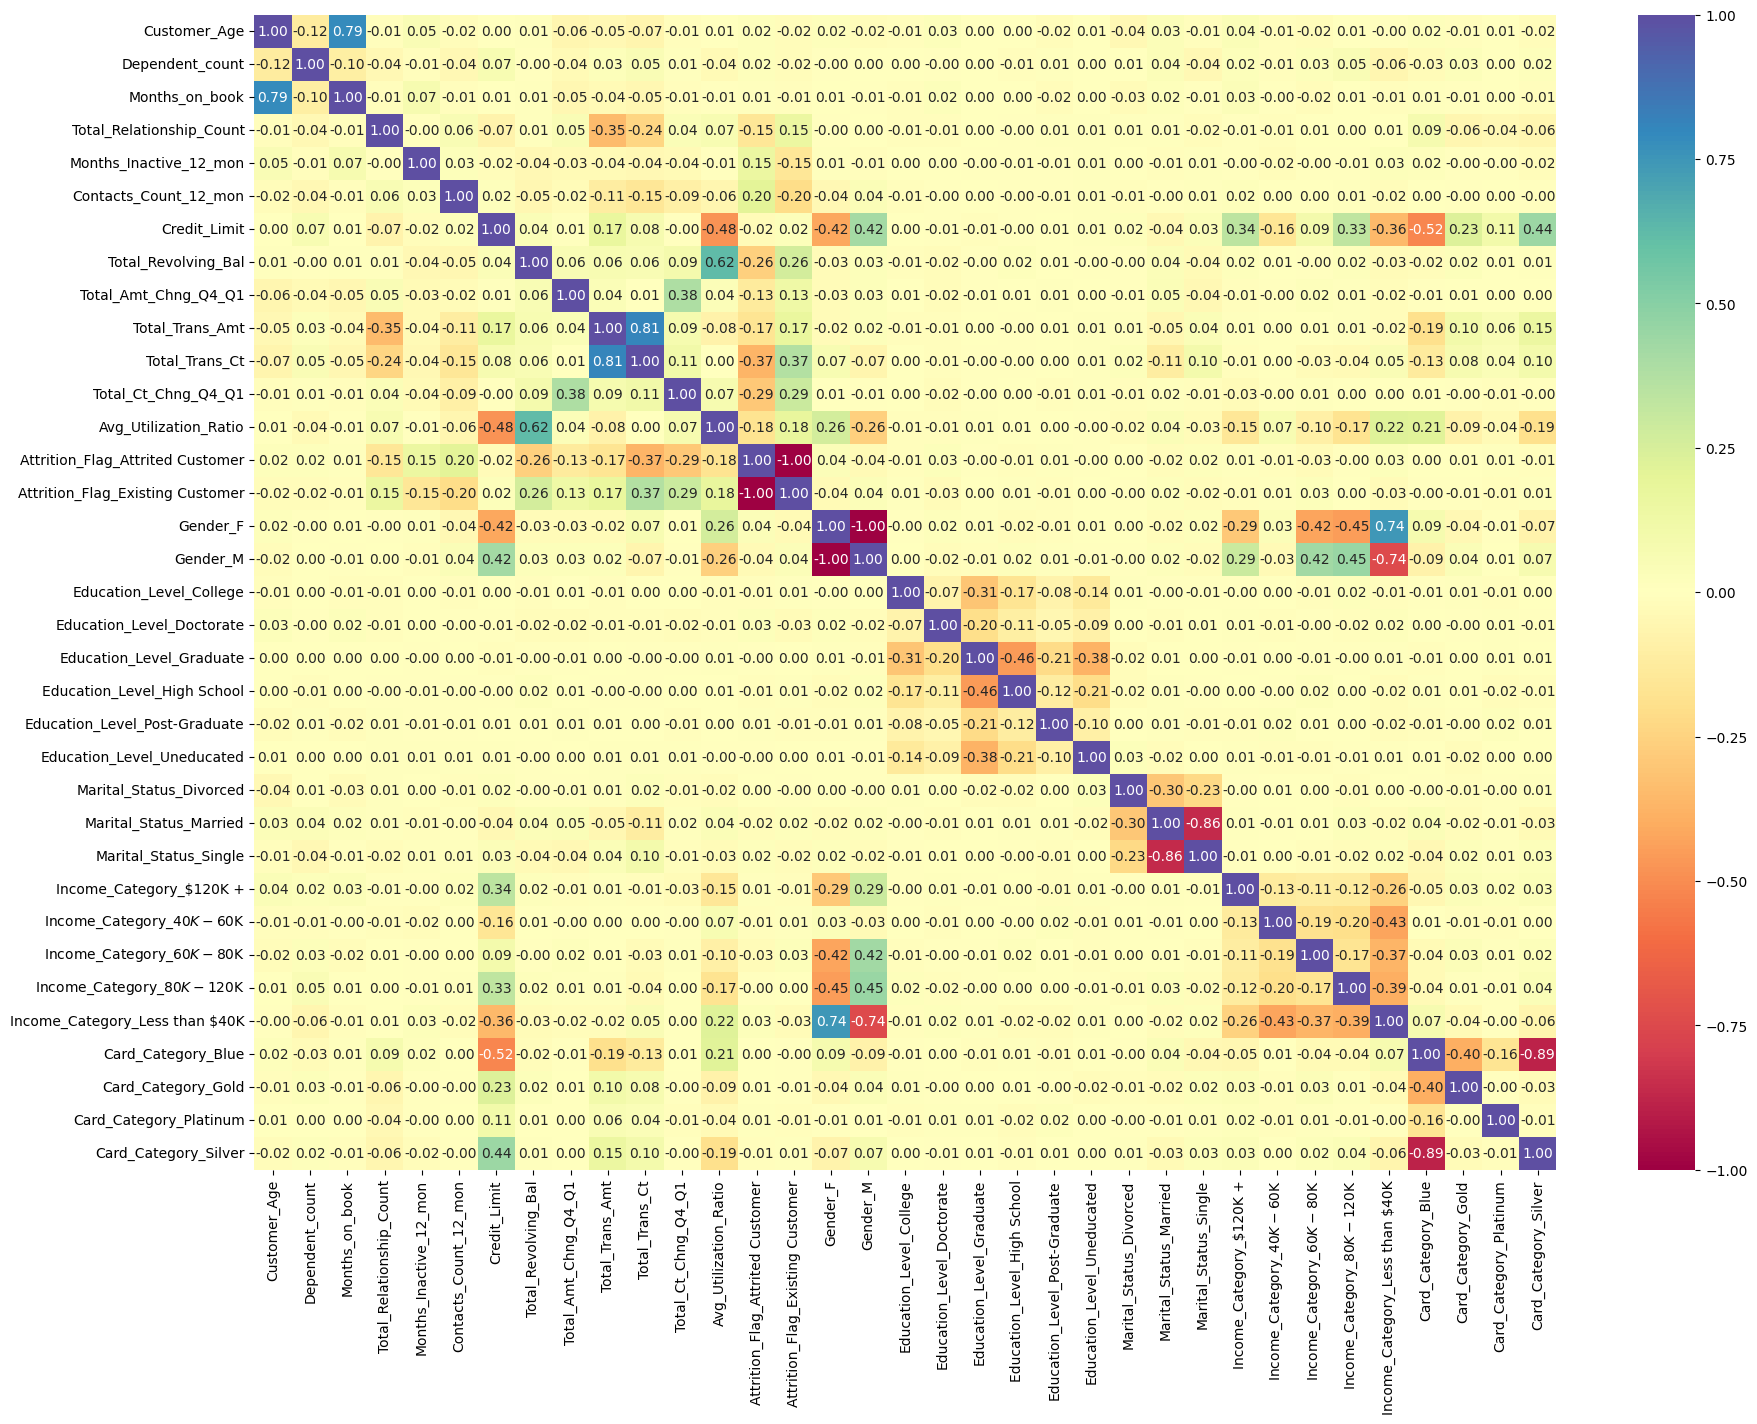

In [ ]:
#Finally, create a headmap to study/cross-validate relationships
#quickly select columns of interest aswell as pre-process the category columns using one-hot encoding
df_select_cols_for_heatmap = df_CleanedUpCols.copy()
df_select_cols_for_heatmap = pd.get_dummies(df_select_cols_for_heatmap) # dont drop any column because we want to evaluate all the columns for their corr with Attrition_Flag

plt.figure(figsize=(21, 15))
sns.heatmap(df_select_cols_for_heatmap.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
- We see that Customer_Age and Months_on_book are highly correlated. We can choose to drop one of them to reduce the curse of dimensionality

- Similarly, Total_Trans_Amt and Total_Trans_Ct are highly correlated. We can choose to drop one of them.

- We see that the Attrition_Flag is negatively correlated with
 - Total_Trans_Ct - which means that there is a high risk of a customer attriting if his/her Total_Trans_Ct is on the lower side.
 - Revolving balance - Similarly, less the revolving balance, higher the risk of customer attrition.
 - Total_Ct_Change_Q4_Q1 - Lower the Total_Ct_Change_Q4_Q1, higher is the risk of customer attrition.
 - Relationship_Count- Lower the Relationship_Count, higher is the chance of customer attrition

- We also see that the attrition_flag is positively correlated with Contact_Count_12_mon, which means higher the no. of contacts by the customer, higher is the risk of customer attrition.

We will further cross-validate the importance of all these variables against the target variable (ie 'Attrition_Flag') when we run their 'feature importance' analysis against the target in our modelling section.



## Data Pre-processing
We wil perform the following pre-processing in this section:
- Check for outliers and treatment ( this activity is for completion sake, we will not be removing any outliers)
- Feature Engineering -
  - remove one of them in the pair of highlycorrelated features  
  - encoding Existing and Attrited customers to 0 and 1 respectively
  - one-hot encoding for rest of the categorical features(ie getdummies)
  - we will not be doing any 'scaling' or 'normalization' aswell since we will be building decision tree based models

### Outlier detection and Treatment

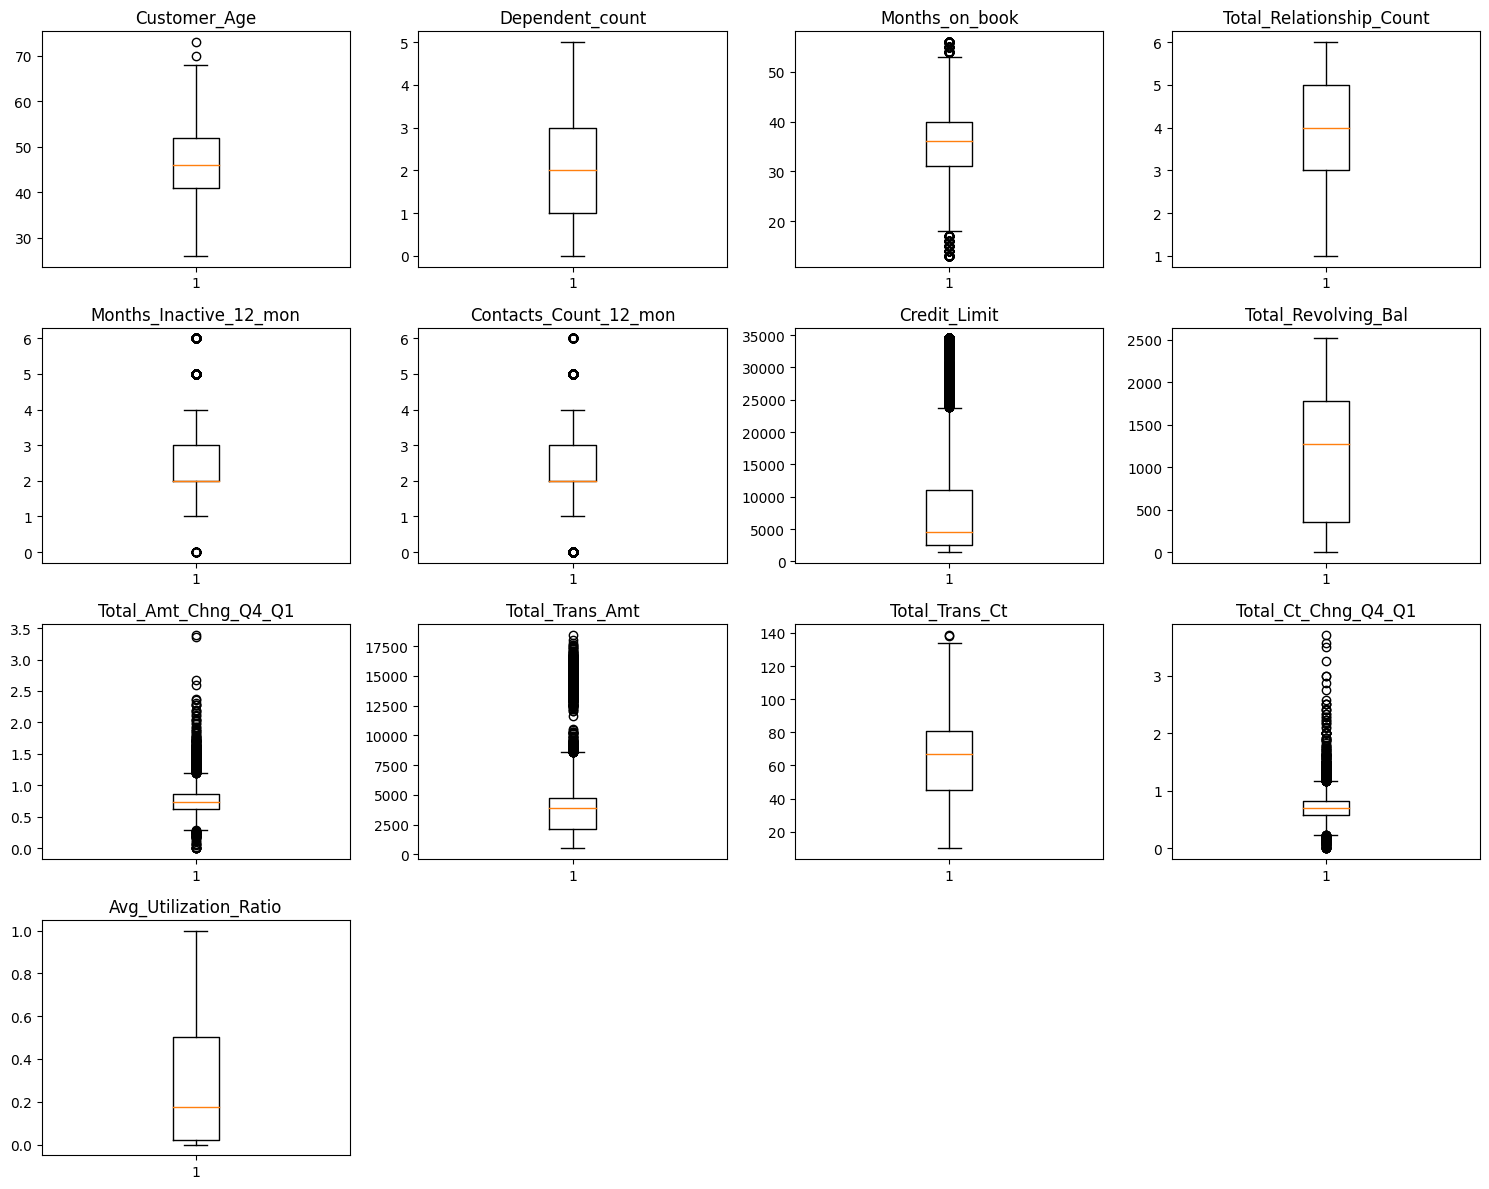

In [ ]:
# outlier detection using boxplot
numeric_columns = df_CleanedUpCols.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_CleanedUpCols[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
As we see, there are quite a few outliers in the data.
However, we will not treat them as they are proper values.
Moreover since we will be building decision tree 'based' ensemble models (since its a classification based predition problem) and given decision tress are impervious to outliers, we will not be treating them aswell.

In [ ]:
#Feature Engineering -
# remove one of them in the pair of highlycorrelated features
df_selected_for_modelling = df_CleanedUpCols.copy()
df_selected_for_modelling = df_selected_for_modelling.drop(columns = ['Months_on_book','Total_Trans_Ct'],axis=1)

## Encoding Existing and Attrited customers to 0 and 1 respectively
df_selected_for_modelling["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df_selected_for_modelling["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

# one-hot encoding for the rest of categorical features
df_selected_for_modelling = pd.get_dummies(df_selected_for_modelling,drop_first=True)

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,5,1,3,12691.000,777,1.335,1144,1.625,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,49,5,6,1,2,8256.000,864,1.541,1291,3.714,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,51,3,4,1,0,3418.000,0,2.594,1887,2.333,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,40,4,3,4,1,3313.000,2517,1.405,1171,2.333,0.760,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,40,3,5,1,0,4716.000,0,2.175,816,2.500,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
5,0,44,2,3,1,2,4010.000,1247,1.376,1088,0.846,0.311,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
6,0,51,4,6,1,3,34516.000,2264,1.975,1330,0.722,0.066,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
7,0,32,0,2,2,2,29081.000,1396,2.204,1538,0.714,0.048,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,0,37,3,5,2,0,22352.000,2517,3.355,1350,1.182,0.113,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
9,0,48,2,6,3,3,11656.000,1677,1.524,1441,0.882,0.144,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


## Model Building
We will use the following approach to arrive at the best model.
- 1) Build 6 models including Decision Tree, Randomforest, BaggingClassifier, AdaBoosting classifier, GradientBoost and XGBoost.
- 2) Train each of these 6 models with 3 varieties of training samples - original sampled data, under-sampled data and over-sampled data

CONVERT OBJECTS or strings into CATEGORICAL DATATYPES
Why do we need to do one-hot encoding after splitting the data even though one-hot encoding doesn't lead to data leakage?
We might do one hot encoding after splitting data if we have missing values in categorical columns as we can't do one-hot encoding for variables with missing values
And missing value imputation leads to data leakage, so should be done after splitting the data.

### Model evaluation criterion

Model can make wrong predictions as:

Predicting a customer will attrite and the customer doesn't attrite
Predicting a customer will not attrite and the customer attrites
Which case is more important?

Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.
How to reduce this loss i.e need to reduce False Negatives??

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


In [ ]:
REf code
param_grid={'n_estimators':[50,100,150,200],
            'learning_rate':[0.01,0.1,0.2,0.3]}

gb = GradientBoostingClassifier(random_state=1)

#Calling RandomizedSearchCV
clf = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=5, random_state=1, n_iter = 10)

clf.fit(X_train,y_train)

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Model Comparison and Final Model Selection

### Test set final performance

# Business Insights and Conclusions

***